In [476]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [477]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [478]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [479]:
df_India=df[df['country']=='India']
df_India.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
22,23,India,Pune,Studio,Semi-Furnished,3504,528252,1983,5,5,...,13513,405880,15,1926,122372,0.26,5,9,3,0
29,30,India,Chennai,Townhouse,Unfurnished,3457,522982,2011,3,1,...,18603,386182,30,1747,136800,0.13,3,9,8,0
69,70,India,Chennai,Studio,Unfurnished,5471,817484,1996,5,3,...,7962,391524,15,2737,425960,0.43,1,6,2,0
86,87,India,Bangalore,Villa,Unfurnished,3092,467475,1985,1,1,...,6959,305786,10,1003,161689,0.50,9,8,1,0
115,116,India,Pune,Apartment,Unfurnished,3440,519504,2012,3,4,...,2253,246418,15,3036,273086,0.95,1,5,1,0


#### We will remove irrelevant variables and avoid model cheating.

In [480]:
df_India = df_India.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [481]:
df_India.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
22,India,Studio,Semi-Furnished,3504,528252,1983,5,1,1,0
29,India,Townhouse,Unfurnished,3457,522982,2011,1,1,0,0
69,India,Studio,Unfurnished,5471,817484,1996,3,3,0,1
86,India,Villa,Unfurnished,3092,467475,1985,1,1,1,0
115,India,Apartment,Unfurnished,3440,519504,2012,4,4,0,1


In [482]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15357 entries, 22 to 199983
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15357 non-null  object
 1   property_type       15357 non-null  object
 2   furnishing_status   15357 non-null  object
 3   property_size_sqft  15357 non-null  int64 
 4   price               15357 non-null  int64 
 5   constructed_year    15357 non-null  int64 
 6   rooms               15357 non-null  int64 
 7   bathrooms           15357 non-null  int64 
 8   garage              15357 non-null  int64 
 9   garden              15357 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [483]:
df_India.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15357.000000,15357.000000,15357.000000,15357.000000,15357.000000,15357.000000,15357.000000
mean,3185.198281,477797.962037,1991.272710,4.538517,2.785635,0.497884,0.503874
std,1612.038969,241828.192926,18.473459,2.295000,1.846554,0.500012,0.500001
min,400.000000,56288.000000,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1786.000000,267841.000000,1975.000000,3.000000,1.000000,0.000000,0.000000
50%,3180.000000,476407.000000,1991.000000,5.000000,2.000000,0.000000,1.000000
75%,4562.000000,684890.000000,2007.000000,7.000000,4.000000,1.000000,1.000000
max,6000.000000,904447.000000,2023.000000,8.000000,8.000000,1.000000,1.000000


In [484]:
df_India.shape

(15357, 10)

In [485]:
df_India.value_counts()

country  property_type      furnishing_status  property_size_sqft  price   constructed_year  rooms  bathrooms  garage  garden
India    Apartment          Fully-Furnished    400                 56288   2023              8      3          1       1         1
         Townhouse          Fully-Furnished    930                 142599  1964              8      1          0       1         1
                                               880                 134488  1997              5      5          0       1         1
                                                                   136056  2018              8      4          1       0         1
                                               902                 138760  1979              8      8          1       1         1
                                                                                                                                ..
         Independent House  Fully-Furnished    666                 99506   1992         

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999929         -0.002404 -0.001611   
price                         0.999929  1.000000         -0.002476 -0.001639   
constructed_year             -0.002404 -0.002476          1.000000  0.000267   
rooms                        -0.001611 -0.001639          0.000267  1.000000   
bathrooms                     0.001556  0.001481          0.006101  0.626246   
garage                        0.006542  0.006551         -0.012684 -0.000199   
garden                        0.006208  0.006204         -0.000107 -0.006812   

                    bathrooms    garage    garden  
property_size_sqft   0.001556  0.006542  0.006208  
price                0.001481  0.006551  0.006204  
constructed_year     0.006101 -0.012684 -0.000107  
rooms                0.626246 -0.000199 -0.006812  
bathrooms            1.000000 -0.005993 -0.003826  
garage              -0.005993  1.000000 -0.0017

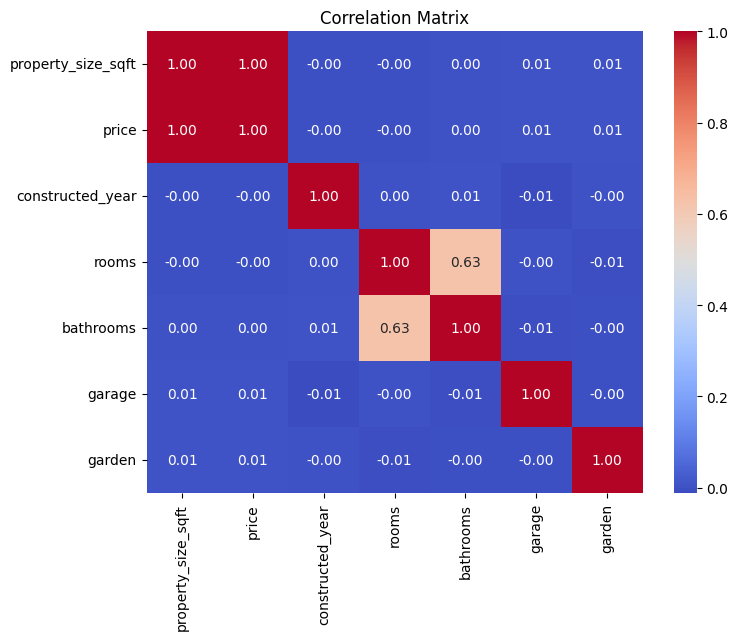

In [486]:
correlation_matrix = df_India.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [487]:
df_India=pd.get_dummies(df_India, columns=['property_type', 'furnishing_status'])
df_India.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
22,India,3504,528252,1983,5,1,1,0,False,False,False,True,False,False,False,True,False
29,India,3457,522982,2011,1,1,0,0,False,False,False,False,True,False,False,False,True
69,India,5471,817484,1996,3,3,0,1,False,False,False,True,False,False,False,False,True
86,India,3092,467475,1985,1,1,1,0,False,False,False,False,False,True,False,False,True
115,India,3440,519504,2012,4,4,0,1,True,False,False,False,False,False,False,False,True


In [488]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15357 entries, 22 to 199983
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15357 non-null  object
 1   property_size_sqft                 15357 non-null  int64 
 2   price                              15357 non-null  int64 
 3   constructed_year                   15357 non-null  int64 
 4   rooms                              15357 non-null  int64 
 5   bathrooms                          15357 non-null  int64 
 6   garage                             15357 non-null  int64 
 7   garden                             15357 non-null  int64 
 8   property_type_Apartment            15357 non-null  bool  
 9   property_type_Farmhouse            15357 non-null  bool  
 10  property_type_Independent House    15357 non-null  bool  
 11  property_type_Studio               15357 non-null  bool  
 12  propert

In [489]:
X = df_India.drop(['price', 'country'], axis=1)
y = df_India['price']

In [490]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [491]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9998555349467476
Linier Regresion RMSE :  2885.1692199987137


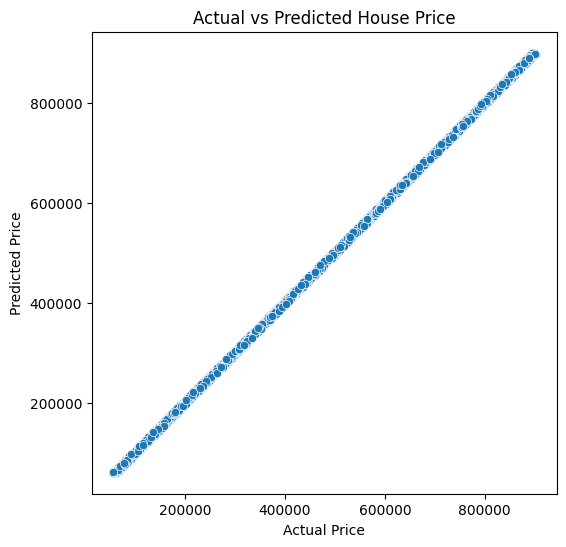

In [492]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [493]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9996955603361792
Decision Tree RMSE :  4188.326273683366


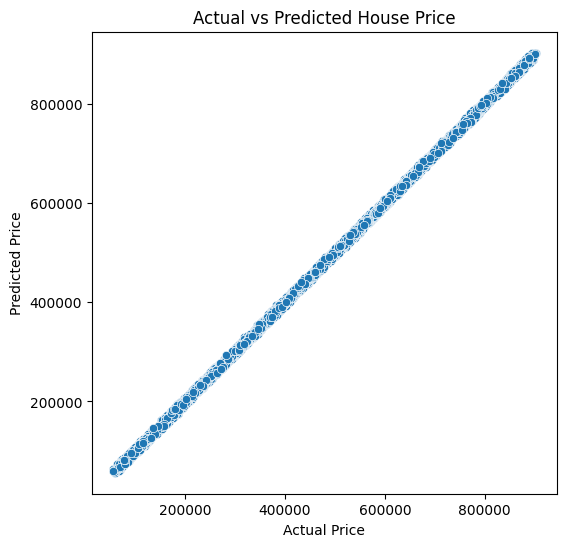

In [494]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [495]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9998295527092217
Random Forest RMSE :  4188.326273683366


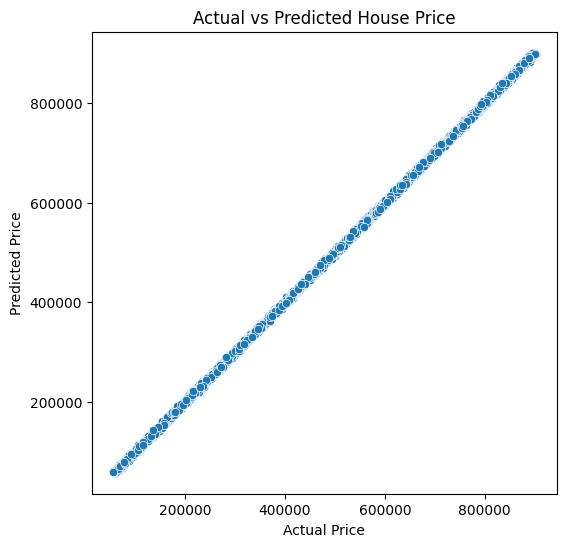

In [496]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [497]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9998005103848479
Gradient Boost RMSE :  4188.326273683366


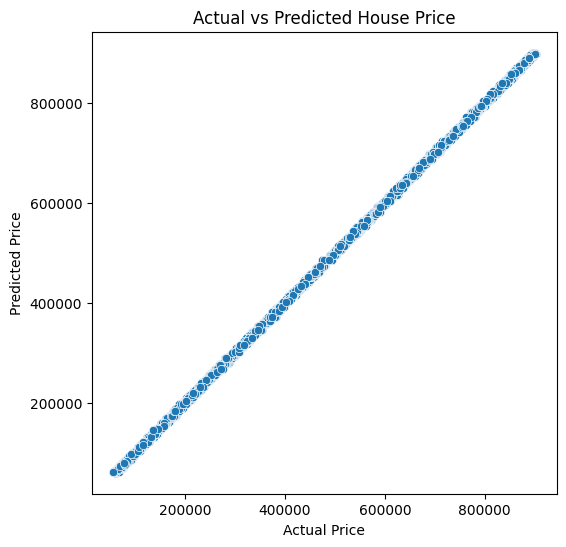

In [498]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [499]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [500]:
result

,metode,R²,RMSE
0,lr,0.999856,2885.169220
1,dt,0.999696,4188.326274
2,rf,0.999830,3133.898602
3,gb,0.999801,3390.392944
